<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/Notebook_Seleccion_Caracteristicas_Correlaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de correlaciones y selección de características
Este notebook interactivo permite explorar cómo se identifican relaciones lineales entre variables y cómo estas relaciones influyen en la selección de características para modelos predictivos.

## 1. Carga de datos y librerías necesarias
Utilizaremos un conjunto de datos simulado para ilustrar la existencia de variables correlacionadas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generar datos con correlación artificial
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
df = pd.DataFrame(X, columns=['edad', 'presion', 'colesterol', 'glucosa', 'bmi'])

# Crear correlaciones artificiales
df['peso'] = df['bmi'] * 1.2 + np.random.normal(0, 0.1, size=100)
df['circunferencia'] = df['bmi'] * 0.9 + np.random.normal(0, 0.1, size=100)
df['y'] = y
df.head()

,edad,presion,colesterol,glucosa,bmi,peso,circunferencia,y
0,0.144044,0.121675,1.454274,0.443863,0.761038,0.910903,0.674764,197.144836
1,0.188779,-0.310886,0.523891,0.097400,0.088422,0.214026,0.081508,37.981417
2,-1.676004,-0.813364,1.152332,-1.466424,1.079619,1.095121,1.156616,-4.767887
3,-0.280355,0.578521,-0.364694,0.349654,0.156704,0.225732,0.119617,11.791158
4,0.844363,1.188030,-1.000215,0.316943,-1.544771,-1.908297,-1.440196,-19.335469


### Interpretación
En esta sección se genera un conjunto de datos artificialmente correlacionado. Por ejemplo, las variables 'bmi', 'peso' y 'circunferencia' fueron construidas de forma que mantuvieran relaciones lineales fuertes. Esto permite simular condiciones reales como las observadas en estudios de salud pública.

## 2. Visualización de la matriz de correlaciones
Se construye un mapa de calor (*heatmap*) para observar visualmente las relaciones lineales entre variables.

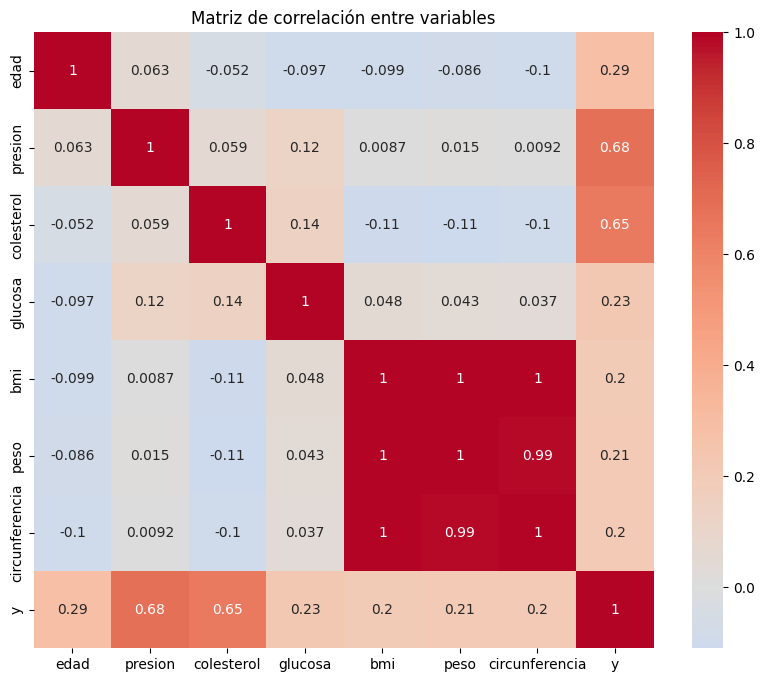

In [2]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables')
plt.show()

### Interpretación
La matriz de correlación representa la fuerza y dirección de la relación lineal entre pares de variables. Colores cercanos al rojo indican correlaciones positivas fuertes; azules intensos, correlaciones negativas. Valores cercanos a cero indican baja relación lineal. Aquí, se evidencian correlaciones fuertes entre 'bmi', 'peso' y 'circunferencia'.

## 3. Eliminación de variables altamente correlacionadas
A continuación se define una función que elimina una de las variables de cada par con una correlación mayor al umbral especificado.

### Interpretación
Se define una función que elimina automáticamente variables que superan un umbral de correlación especificado. Esta operación es útil para prevenir la multicolinealidad en modelos estadísticos, ya que evita redundancias entre predictores. El resultado muestra un subconjunto más compacto de variables representativas.

In [3]:
def eliminar_correlacionadas(df, umbral=0.85):
    matriz_corr = df.corr().abs()
    upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > umbral)]
    return df.drop(columns=to_drop), to_drop

# Aplicar función al conjunto de datos
df_filtrado, eliminadas = eliminar_correlacionadas(df.drop(columns='y'))
print("Variables eliminadas por alta correlación:", eliminadas)
df_filtrado.head()

Variables eliminadas por alta correlación: ['peso', 'circunferencia']


,edad,presion,colesterol,glucosa,bmi
0,0.144044,0.121675,1.454274,0.443863,0.761038
1,0.188779,-0.310886,0.523891,0.097400,0.088422
2,-1.676004,-0.813364,1.152332,-1.466424,1.079619
3,-0.280355,0.578521,-0.364694,0.349654,0.156704
4,0.844363,1.188030,-1.000215,0.316943,-1.544771


### Interpretación
Este ejercicio permite al estudiante experimentar con diferentes umbrales de correlación y analizar cómo cambia la selección de variables. Umbrales más bajos eliminan más variables, lo cual puede ser útil si se prioriza la simplicidad del modelo; sin embargo, podrían descartarse variables relevantes.

## 4. Ejercicio propuesto
**Instrucción:** Modifique el umbral de correlación a 0.70 y observe cuántas variables son eliminadas. ¿Cuál cree que es un buen umbral dependiendo del contexto del problema?

```python
# Modifique este umbral
df_filtrado, eliminadas = eliminar_correlacionadas(df.drop(columns='y'), umbral=0.70)
print("Variables eliminadas con umbral 0.70:", eliminadas)
```

## Conclusiones
- El análisis de correlaciones permite detectar redundancias entre variables cuantitativas.
- El uso de umbrales razonables (como 0.85) puede ayudar a reducir el número de variables sin perder información significativa.
- Esta técnica mejora la interpretabilidad y eficiencia de los modelos de ciencia de datos, especialmente en contextos con muchas variables.
- Es recomendable combinar este enfoque con otros métodos supervisados como RFE, SelectKBest o penalizaciones L1.

### Interpretación
Las conclusiones refuerzan el aprendizaje obtenido en el análisis de correlaciones y su impacto sobre la calidad de los modelos. También se invita a considerar otras técnicas complementarias de selección de características para mejorar el desempeño del análisis.